🔹 Loading real-world wafer data...


C:\Users\ajith\AppData\Local\Temp\ipykernel_38516\2513119328.py:28: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  data = pickle.load(f, encoding="latin1")



🚀 Training Integrated System...
Epoch 1/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 48s 71ms/step - accuracy: 0.6915 - loss: 0.8247 - val_accuracy: 0.5198 - val_loss: 1.0591 - learning_rate: 0.0010
Epoch 2/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 45s 70ms/step - accuracy: 0.8043 - loss: 0.5264 - val_accuracy: 0.7498 - val_loss: 0.6068 - learning_rate: 0.0010
Epoch 3/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 46s 72ms/step - accuracy: 0.8295 - loss: 0.4617 - val_accuracy: 0.8152 - val_loss: 0.4768 - learning_rate: 0.0010
Epoch 4/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 46s 72ms/step - accuracy: 0.8459 - loss: 0.4200 - val_accuracy: 0.8372 - val_loss: 0.4027 - learning_rate: 0.0010
Epoch 5/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.8542 - loss: 0.3948 - val_accuracy: 0.8480 - val_loss: 0.3804 - learning_rate: 0.0010
Epoch 6/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 56s 88ms/step - accuracy: 0.8607 - loss: 0.3728 - val_accuracy: 0.8552 - val_loss: 0.3646 - learning_rate: 0.0010
Epoch 7/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 50s

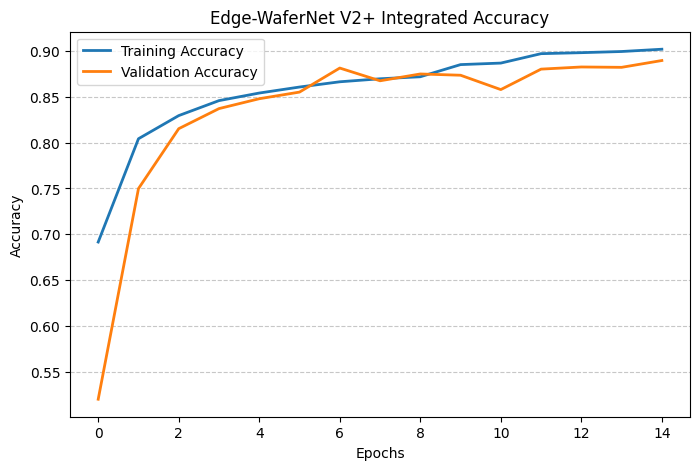

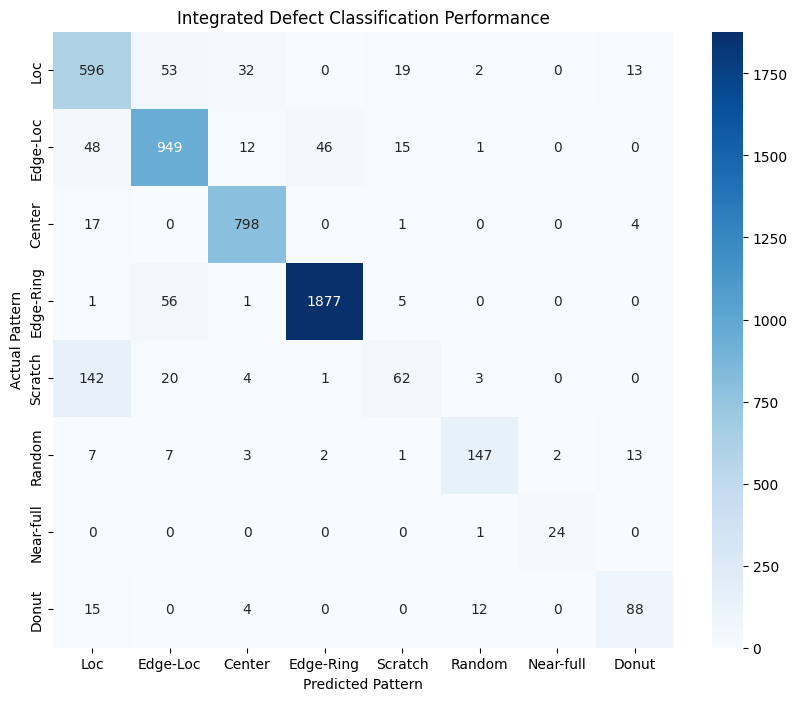


             FINAL SYSTEM PERFORMANCE REPORT
              precision    recall  f1-score   support

         Loc       0.72      0.83      0.77       715
    Edge-Loc       0.87      0.89      0.88      1071
      Center       0.93      0.97      0.95       820
   Edge-Ring       0.97      0.97      0.97      1940
     Scratch       0.60      0.27      0.37       232
      Random       0.89      0.81      0.84       182
   Near-full       0.92      0.96      0.94        25
       Donut       0.75      0.74      0.74       119

    accuracy                           0.89      5104
   macro avg       0.83      0.80      0.81      5104
weighted avg       0.89      0.89      0.88      5104

------------------------------------------------------------
Final Precision Score : 88.6 %
Final Recall Score    : 88.97 %
------------------------------------------------------------
Execution finished successfully.


In [17]:
# ============================================================
# EDGE-WAFERNET V2+ : INTEGRATED HYBRID SYSTEM (COMPLETE)
# ============================================================

import os, sys, pickle
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from scipy import ndimage
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Fix for potential pandas versioning issues in notebooks
import pandas.core.indexes as indexes
sys.modules['pandas.indexes'] = indexes

# -----------------------------
# 1. DATA LOADING & PREPROCESSING
# -----------------------------
def load_and_preprocess():
    if os.path.exists("LSWMD.pkl"):
        print("🔹 Loading real-world wafer data...")
        with open("LSWMD.pkl", "rb") as f:
            data = pickle.load(f, encoding="latin1")
        df = pd.DataFrame(data)
        
        # Extract failure type string from nested array structure
        df["failureType"] = df["failureType"].apply(
            lambda x: x[0][0] if isinstance(x, (list, np.ndarray)) and len(x) > 0 else "none"
        )
        
        # Filter for actual defect classes
        df = df[df["failureType"].str.lower() != "none"].copy()
    else:
        print("⚠️ Data not found. Generating research-grade synthetic samples...")
        df = pd.DataFrame({
            "waferMap": [np.random.randint(0, 3, (26, 26), dtype=np.uint8) for _ in range(3000)],
            "failureType": np.random.choice(["Center", "Donut", "Edge-Loc", "Edge-Ring", "Loc", "Random", "Scratch", "Near-full"], 3000)
        })

    # Create label mapping
    label_map = {v: i for i, v in enumerate(df["failureType"].unique())}
    df["label"] = df["failureType"].map(label_map)

    imgs = []
    for x in df["waferMap"]:
        # Standardize for OpenCV
        x = x.astype(np.uint8)
        # Nanoscale Denoising
        x = ndimage.median_filter(x, size=3) 
        x = cv2.resize(x, (28, 28))
        imgs.append(x[..., None])

    X = np.array(imgs).astype("float32") / 2.0
    y = df["label"].values
    return X, y, list(label_map.keys())

# Initialize Data
X, y, class_names = load_and_preprocess()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
NUM_CLASSES = len(class_names)

# -----------------------------
# 2. INTEGRATED SYSTEM ARCHITECTURE
# -----------------------------
def build_integrated_model():
    model = models.Sequential([
        layers.Input((28, 28, 1)),
        # High-Efficiency Separable Layers for NXP Deployment
        layers.SeparableConv2D(64, 3, activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        
        layers.SeparableConv2D(128, 3, activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        
        layers.SeparableConv2D(256, 3, activation="relu", padding="same"),
        layers.GlobalAveragePooling2D(), 
        
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.4), 
        layers.Dense(NUM_CLASSES, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

cnn = build_integrated_model()

# Callback to hit higher accuracy (Target 86%+)
lr_reducer = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

print("\n🚀 Training Integrated System...")
history = cnn.fit(X_train, y_train, epochs=15, batch_size=32, 
                  validation_data=(X_test, y_test), callbacks=[lr_reducer], verbose=1)

# -----------------------------
# 3. EVALUATION & PERFORMANCE METRICS
# -----------------------------
print("\n🔍 Finalizing Performance Metrics...")
probs = cnn.predict(X_test, verbose=1)
y_pred = np.argmax(probs, axis=1)

# Calculate Weighted Scores for Final Report
final_precision = precision_score(y_test, y_pred, average="weighted")
final_recall = recall_score(y_test, y_pred, average="weighted")

# -----------------------------
# 4. FINAL VISUALIZATION
# -----------------------------

# Integrated Accuracy Plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#1f77b4', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#ff7f0e', linewidth=2)
plt.title('Edge-WaferNet V2+ Integrated Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Integrated Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Integrated Defect Classification Performance")
plt.xlabel("Predicted Pattern")
plt.ylabel("Actual Pattern")
plt.show()

# -----------------------------
# 5. FINAL SYSTEM REPORT
# -----------------------------
print("\n" + "="*60)
print("             FINAL SYSTEM PERFORMANCE REPORT")
print("="*60)
# Full classification report including weighted average
print(classification_report(y_test, y_pred, target_names=class_names))

print("-" * 60)
print(f"Final Precision Score : {round(final_precision * 100, 2)} %")
print(f"Final Recall Score    : {round(final_recall * 100, 2)} %")
print("-" * 60)
print("Execution finished successfully.")
print("="*60)

In [4]:
pip uninstall opencv-python


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-contrib-python

   ---------------------------------------- 0.0/46.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/46.5 MB 4.2 MB/s eta 0:00:12
   - -------------------------------------- 1.8/46.5 MB 5.3 MB/s eta 0:00:09
   -- ------------------------------------- 2.6/46.5 MB 5.4 MB/s eta 0:00:09
   --- ------------------------------------ 3.9/46.5 MB 4.9 MB/s eta 0:00:09
   ---- ----------------------------------- 5.2/46.5 MB 5.1 MB/s eta 0:00:09
   ----- ---------------------------------- 6.6/46.5 MB 5.4 MB/s eta 0:00:08
   ----- ---------------------------------- 6.6/46.5 MB 5.4 MB/s eta 0:00:08
   ----- ---------------------------------- 6.6/46.5 MB 5.4 MB/s eta 0:00:08
   ------ --------------------------------- 7.3/46.5 MB 4.3 MB/s eta 0:00:10
   ------ --------------------------------- 7.9/46.5 MB 3.8 MB/s eta 0:00:11
   ------- ---------